## SHAP plots

**For Figures 9 and S6**

10000 NARVAL samples are sufficient for absolutely robust plots and SHAP Values

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import shap

import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FormatStrFormatter

constructed_base = False # For the absolute average SHAP value plot, there is no reason for why B_f = B_g on layer 32 should be enforced

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [20]:
import matplotlib

# Increase the general font size in plots
size_plots_label = 23
matplotlib.rcParams['legend.fontsize'] = size_plots_label
matplotlib.rcParams['axes.labelsize'] = size_plots_label+2 # For an axes xlabel and ylabel
matplotlib.rcParams['axes.titlesize'] = size_plots_label+4 # For an axes xlabel and ylabel
matplotlib.rcParams['xtick.labelsize'] = size_plots_label-2
matplotlib.rcParams['ytick.labelsize'] = size_plots_label-2

In [2]:
r2b4_file = '/pf/b/b309170/workspace_icon-ml/iconml_clc/additional_content/shap_values/averaged_shap_values/r2b4_column-based_on_narval_r2b5.txt'
if constructed_base:
    r2b5_file = '/pf/b/b309170/workspace_icon-ml/iconml_clc/additional_content/shap_values/averaged_shap_values/r2b5_column-based_fold_2_on_narval_r2b5_constructed_base_value.txt'
else:
    r2b5_file = '/pf/b/b309170/workspace_icon-ml/iconml_clc/additional_content/shap_values/averaged_shap_values/r2b5_column-based_fold_2_on_narval_r2b5.txt'

### Absolute average SHAP values

**R2B4**

In [3]:
with open(r2b4_file, 'r') as file:
    lines = file.readlines()

In [4]:
start_read_ind_r2b4 = 36

In [5]:
print(lines[start_read_ind_r2b4])
time_3 = 758.27 # from lines[19]

Number of NARVAL samples: 10000



In [6]:
print(lines[start_read_ind_r2b4+2])
msv = lines[start_read_ind_r2b4+3].split('[')
print(lines[start_read_ind_r2b4+4])
vsv = lines[start_read_ind_r2b4+5].split('[')
print(lines[start_read_ind_r2b4+6])
masv = lines[start_read_ind_r2b4+7].split('[')

Mean SHAP values:

Variance SHAP values:

Mean absolute SHAP values:



In [7]:
mean_shap_values_r2b4 = np.zeros((27, 186))
variance_shap_values_r2b4 = np.zeros((27, 186))
mean_abs_shap_values_r2b4 = np.zeros((27, 186))

In [8]:
for layer in range(1, 28):
    mean_shap_values_r2b4[layer-1] = np.fromstring(msv[layer][:-1], dtype=np.float16, sep=',')
    variance_shap_values_r2b4[layer-1] = np.fromstring(vsv[layer][:-1], dtype=np.float16, sep=',')
    mean_abs_shap_values_r2b4[layer-1] = np.fromstring(masv[layer][:-1], dtype=np.float16, sep=',')

string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.


In [9]:
# Add the removed fields
mean_shap_values_r2b4 = np.insert(mean_shap_values_r2b4, 27, np.zeros(27), axis=1)
variance_shap_values_r2b4 = np.insert(variance_shap_values_r2b4, 27, np.zeros(27), axis=1)
mean_abs_shap_values_r2b4 = np.insert(mean_abs_shap_values_r2b4, 27, np.zeros(27), axis=1)
    
for i in range(3):
    mean_shap_values_r2b4 = np.insert(mean_shap_values_r2b4, 162, np.zeros(27), axis=1)
    variance_shap_values_r2b4 = np.insert(variance_shap_values_r2b4, 162, np.zeros(27), axis=1)
    mean_abs_shap_values_r2b4 = np.insert(mean_abs_shap_values_r2b4, 162, np.zeros(27), axis=1)

**R2B5**

In [10]:
with open(r2b5_file, 'r') as file:
    lines = file.readlines()

In [11]:
if constructed_base:
    start_read_ind_r2b5 = 0 # 0 or 11
else:
    start_read_ind_r2b5 = 36 
print(lines[start_read_ind_r2b5])

Number of NARVAL samples: 10000



In [12]:
if constructed_base:
    start_read_ind_r2b5 += 2

In [13]:
print(lines[start_read_ind_r2b5+2])
msv = lines[start_read_ind_r2b5+3].split('[')
print(lines[start_read_ind_r2b5+4])
vsv = lines[start_read_ind_r2b5+5].split('[')
print(lines[start_read_ind_r2b5+6])
masv = lines[start_read_ind_r2b5+7].split('[')

Mean SHAP values:

Variance SHAP values:

Mean absolute SHAP values:



In [14]:
mean_shap_values_r2b5 = np.zeros((27, 154))
variance_shap_values_r2b5 = np.zeros((27, 154))
mean_abs_shap_values_r2b5 = np.zeros((27, 154))

In [15]:
for layer in range(1, 28):
    mean_shap_values_r2b5[layer-1] = np.fromstring(msv[layer][:-1], dtype=np.float16, sep=',')
    variance_shap_values_r2b5[layer-1] = np.fromstring(vsv[layer][:-1], dtype=np.float16, sep=',')
    mean_abs_shap_values_r2b5[layer-1] = np.fromstring(masv[layer][:-1], dtype=np.float16, sep=',')

string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.


In [16]:
# Add the removed fields
for i in range(6):
    mean_shap_values_r2b5 = np.insert(mean_shap_values_r2b5, 27, np.zeros(27), axis=1)
    variance_shap_values_r2b5 = np.insert(variance_shap_values_r2b5, 27, np.zeros(27), axis=1)
    mean_abs_shap_values_r2b5 = np.insert(mean_abs_shap_values_r2b5, 27, np.zeros(27), axis=1)
    
for i in range(3):
    mean_shap_values_r2b5 = np.insert(mean_shap_values_r2b5, 135, np.zeros(27), axis=1)
    variance_shap_values_r2b5 = np.insert(variance_shap_values_r2b5, 135, np.zeros(27), axis=1)
    mean_abs_shap_values_r2b5 = np.insert(mean_abs_shap_values_r2b5, 135, np.zeros(27), axis=1)

zg r2b5 has absolute SHAP values below 0.694
fr_land r2b5 has absolute SHAP values below 0.097

p r2b4 has absolute SHAP values below 1.436
rho r2b4 has absolute SHAP values below 1.777
zg r2b4 has absolute SHAP values below 0.201
fr_lake r2b4 has absolute SHAP values below 0.052


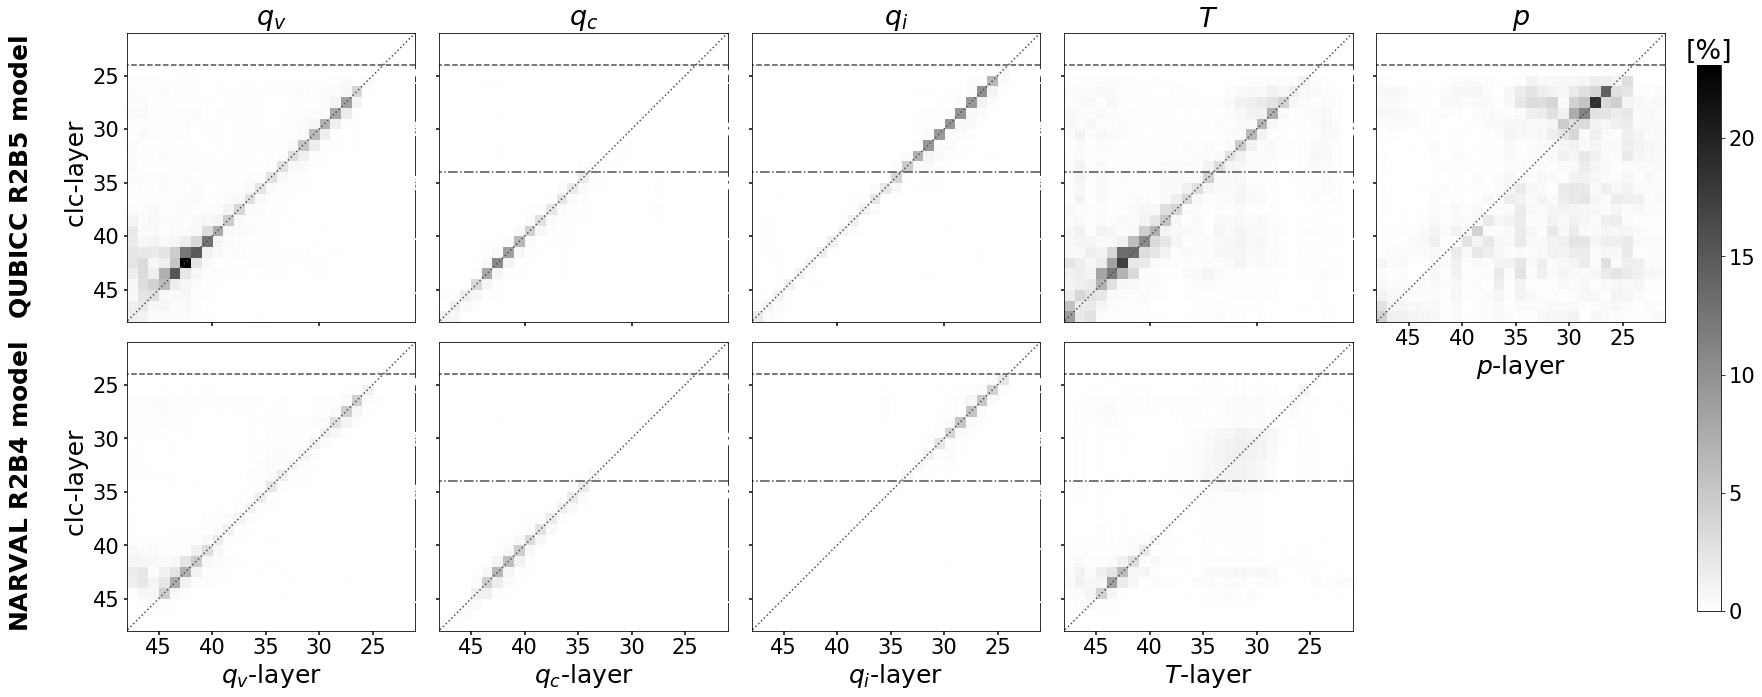

In [21]:
fig = plt.figure(figsize=(28,11))
# plt.subplots_adjust(bottom=0.1)

# label_size = 24 # x-labels, y-labels and titles
# tick_label_size = 15

## R2B5 ##

# # To be able to compare the SHAP value colorbar with the one from the R2B4 model, we need to add the difference of the 
# # QUBICC-base and the NARVAL-base value to vmax!
# # According to pf/b/b309170/workspace_icon-ml/cloud_cover_parameterization/additional_content/plots_offline_paper/r2b4_mean_clc.ipynb
# # the base value for NARVAL is 3.625 and for QUBICC acc. to qubicc_models_plots.ipynb is 9 (average data_mean_column_clc_qubicc)
# qubicc_base = 9
# narval_base = 3.625
# vmax_r2b4 = 8

# vmin = 0
# vmax = vmax_r2b4 + qubicc_base - narval_base

vmin = 0
vmax_r2b4 = np.max(mean_abs_shap_values_r2b5) 
vmax = vmax_r2b4
ticks=[25, 30, 35, 40, 45]

cmap_abs = LinearSegmentedColormap.from_list("", ["white","black"])

# First plot
ax = fig.add_subplot(251)
plt.title('$q_v$')
plt.ylabel(r"$\bf{QUBICC\ R2B5\ model}$" + '\n \n clc-layer')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
plt.xticks(color='w')
plt.tick_params(axis='both', width=1.5)
im_r2b5 = ax.imshow(np.flip(mean_abs_shap_values_r2b5[:, :27], axis=1), extent=(48,21,48,21), 
               vmin=0, vmax=vmax, cmap=cmap_abs)

# Second plot
ax = fig.add_subplot(252)
plt.title('$q_c$')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
ax.plot([21, 48], [34, 34], ls="-.", c=".3") # Freezing level
plt.xticks(color='w')
plt.yticks(color='w')
plt.tick_params(axis='both', width=1.5)
im_r2b5 = ax.imshow(np.flip(mean_abs_shap_values_r2b5[:, 27:54], axis=1), extent=(48,21,48,21), 
               vmin=0, vmax=vmax, cmap=cmap_abs)

# Third plot
ax = fig.add_subplot(253)
plt.title('$q_i$')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
ax.plot([21, 48], [34, 34], ls="-.", c=".3") # Freezing level
plt.xticks(color='w')
plt.yticks(color='w')
plt.tick_params(axis='both', width=1.5)
im_r2b5 = ax.imshow(np.flip(mean_abs_shap_values_r2b5[:, 54:81], axis=1), extent=(48,21,48,21), 
               vmin=0, vmax=vmax, cmap=cmap_abs)

# Forth plot
ax = fig.add_subplot(254)
plt.title('$T$')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
ax.plot([21, 48], [34, 34], ls="-.", c=".3") # Freezing level
plt.xticks(color='w')
plt.yticks(color='w')
plt.tick_params(axis='both', width=1.5)
im_r2b5 = ax.imshow(np.flip(mean_abs_shap_values_r2b5[:, 81:108], axis=1), extent=(48,21,48,21), 
                   vmin=0, vmax=vmax, cmap=cmap_abs)

# Fifth plot
ax = fig.add_subplot(255)
plt.xlabel('$p$-layer')
plt.title('$p$')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
# plt.xticks(color='w')
plt.yticks(color='w')
plt.tick_params(axis='both', width=1.5)
im_r2b5 = ax.imshow(np.flip(mean_abs_shap_values_r2b5[:, 108:135], axis=1), extent=(48,21,48,21), 
               vmin=0, vmax=vmax, cmap=cmap_abs)
plt.xticks(ticks)

print('zg r2b5 has absolute SHAP values below %.3f'%np.max(mean_abs_shap_values_r2b5[:, 135:162]))

print('fr_land r2b5 has absolute SHAP values below %.3f\n'%np.max(mean_abs_shap_values_r2b5[:, 162]))

plt.subplots_adjust(wspace=0, hspace=0.2)

# # Colorbar axes
cbar_ax = fig.add_axes([0.91, 0.15, 0.012, 0.69])  # The dimensions [left, bottom, width, height] of the new axes. All
                                                 # quantities are in fractions of figure width and height.
cb_r2b5 = fig.colorbar(im_r2b5, cax=cbar_ax)
# cb_r2b5.ax.tick_params(labelsize=tick_label_size)
cb_r2b5.ax.set_title('[%]')

########################

## R2B4 ##

# First plot
ax = fig.add_subplot(256)
plt.xlabel('$q_v$-layer')
plt.ylabel(r"$\bf{NARVAL\ R2B4\ model}$" + '\n \n clc-layer')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
plt.tick_params(axis='both', width=1.5)
im_r2b4 = ax.imshow(np.flip(mean_abs_shap_values_r2b4[:, :27], axis=1), extent=(48,21,48,21), 
               vmin=vmin, vmax=vmax_r2b4, cmap=cmap_abs)
plt.xticks(ticks)

# Second plot
ax = fig.add_subplot(257)
plt.xlabel('$q_c$-layer')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
ax.plot([21, 48], [34, 34], ls="-.", c=".3") # Freezing level
plt.tick_params(axis='both', width=1.5)
plt.yticks(color='w')
im_r2b4 = ax.imshow(np.flip(mean_abs_shap_values_r2b4[:, 27:54], axis=1), extent=(48,21,48,21), 
               vmin=vmin, vmax=vmax_r2b4, cmap=cmap_abs)
plt.xticks(ticks)

# Third plot
ax = fig.add_subplot(258)
plt.xlabel('$q_i$-layer')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
ax.plot([21, 48], [34, 34], ls="-.", c=".3") # Freezing level
plt.tick_params(axis='both', width=1.5)
plt.yticks(color='w')
im_r2b4 = ax.imshow(np.flip(mean_abs_shap_values_r2b4[:, 54:81], axis=1), extent=(48,21,48,21), 
               vmin=vmin, vmax=vmax_r2b4, cmap=cmap_abs)
plt.xticks(ticks)

# Forth plot
ax = fig.add_subplot(259)
plt.xlabel('$T$-layer')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
ax.plot([21, 48], [34, 34], ls="-.", c=".3") # Freezing level
plt.tick_params(axis='both', width=1.5)
plt.yticks(color='w')
im_r2b4 = ax.imshow(np.flip(mean_abs_shap_values_r2b4[:, 81:108], axis=1), extent=(48,21,48,21), 
                   vmin=vmin, vmax=vmax_r2b4, cmap=cmap_abs)
plt.xticks(ticks)

# # Fifth plot
# ax = fig.add_subplot(2,5,10)
# plt.xlabel('$p$-layer')
# ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
# ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
# plt.tick_params(axis='both', width=1.5)
# plt.yticks(color='w')
# im_r2b4 = ax.imshow(np.flip(mean_abs_shap_values_r2b4[:, 108:135], axis=1), extent=(48,21,48,21), 
#                    vmin=vmin, vmax=vmax_r2b4, cmap=cmap_abs)

# # Fifth plot
# ax = fig.add_subplot(2,5,10)
# plt.xlabel('$rho$-layer')
# ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
# ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
# plt.tick_params(axis='both', width=1.5)
# plt.yticks(color='w')
# im_r2b4 = ax.imshow(np.flip(mean_abs_shap_values_r2b4[:, 135:162], axis=1), extent=(48,21,48,21), 
#                    vmin=vmin, vmax=vmax_r2b4, cmap=cmap_abs)


print('p r2b4 has absolute SHAP values below %.3f'%np.max(mean_abs_shap_values_r2b4[:, 108:135]))

print('rho r2b4 has absolute SHAP values below %.3f'%np.max(mean_abs_shap_values_r2b4[:, 135:162]))

print('zg r2b4 has absolute SHAP values below %.3f'%np.max(mean_abs_shap_values_r2b4[:, 162:189]))

print('fr_lake r2b4 has absolute SHAP values below %.3f'%np.max(mean_abs_shap_values_r2b4[:, 189]))

plt.subplots_adjust(wspace=0, hspace=0.07)

# # # Colorbar axes
# cbar_ax = fig.add_axes([0.91, 0.13, 0.012, 0.35])  # The dimensions [left, bottom, width, height] of the new axes. All
#                                                 # quantities are in fractions of figure width and height.
# cb_r2b4 = fig.colorbar(im_r2b4, cax=cbar_ax)
# # cb.ax.set_title('[%]')

# plt.savefig('figures/average_absolute_SHAP_values.pdf')

In [22]:
### qv, qc, qi, T, p, rho, zg
## Most important variable in the boundary layer (up to 1km, six surface-closest layers)
print('R2B4 Bdry layer:')
for i in range(5):
    print(np.sum(mean_abs_shap_values_r2b4[-6:, 27*i:27*(i+1)][:, -6:])) # qv, T, qc
print('\nR2B5 Bdry layer:')
for i in range(7):
    print(np.sum(mean_abs_shap_values_r2b5[-6:, 27*i:27*(i+1)][:, -6:])) # T, qv, qc

# --> T and qv are the most important variables in the boundary layer

## Most important variable below the freezing level and above the boundary layer (below layer 34)
print('\nR2B4 below freezing:')
for i in range(5):
    print(np.sum(mean_abs_shap_values_r2b4[-14:-6, 27*i:27*(i+1)][:, -14:-6])) # qc, qv
print('\nR2B5 below freezing:')
for i in range(7):
    print(np.sum(mean_abs_shap_values_r2b5[-14:-6, 27*i:27*(i+1)][:, -14:-6])) # T, qv
    
# --> T and qc are the most important variables below freezing

## Most important variable above the freezing level (above layer 34)
print('\nR2B4 above freezing:')
for i in range(5):
    print(np.sum(mean_abs_shap_values_r2b4[:-14, 27*i:27*(i+1)][:, :-14])) # T, qi, p
print('\nR2B5 above freezing:')
for i in range(7):
    print(np.sum(mean_abs_shap_values_r2b5[:-14, 27*i:27*(i+1)][:, :-14])) # p, qi, T
    
# --> p and T are the most important variables below freezing

R2B4 Bdry layer:
39.544166564941406
18.951148986816406
0.005002021789550781
34.15312194824219
3.656269073486328

R2B5 Bdry layer:
102.34765625
32.61878204345703
11.11236572265625
114.0667724609375
25.505279541015625
6.37738037109375
0.3819732666015625

R2B4 below freezing:
26.4873046875
32.88948059082031
0.7049474716186523
15.078292846679688
5.85784912109375

R2B5 below freezing:
77.10028076171875
40.114959716796875
19.011917114257812
100.781494140625
47.9329833984375
10.8369140625
0.0

R2B4 above freezing:
32.50221824645996
2.40798282623291
42.784475326538086
45.129727363586426
41.57943153381348

R2B5 above freezing:
68.19482135772705
3.959077835083008
92.77747535705566
84.53774356842041
197.52389240264893
6.335367202758789
0.0


In [23]:
mean_abs_shap_values_r2b4[-5:, 27*i:27*(i+1)]

array([[0.000, 0.000, 0.000, 0.129, 0.108, 0.110, 0.149, 0.130, 0.050,
        0.123, 0.052, 0.079, 0.037, 0.080, 0.061, 0.048, 0.085, 0.078,
        0.043, 0.060, 0.059, 0.119, 0.114, 0.031, 0.035, 0.134, 0.135],
       [0.000, 0.000, 0.000, 0.017, 0.018, 0.057, 0.061, 0.045, 0.040,
        0.064, 0.027, 0.011, 0.050, 0.025, 0.036, 0.023, 0.048, 0.017,
        0.017, 0.028, 0.018, 0.014, 0.020, 0.040, 0.022, 0.026, 0.036],
       [0.000, 0.000, 0.000, 0.013, 0.010, 0.017, 0.018, 0.018, 0.022,
        0.026, 0.011, 0.011, 0.012, 0.018, 0.017, 0.029, 0.011, 0.018,
        0.018, 0.031, 0.032, 0.037, 0.036, 0.035, 0.028, 0.037, 0.028],
       [0.000, 0.000, 0.000, 0.006, 0.005, 0.005, 0.005, 0.006, 0.006,
        0.007, 0.005, 0.005, 0.006, 0.006, 0.005, 0.009, 0.007, 0.007,
        0.008, 0.011, 0.012, 0.014, 0.012, 0.013, 0.014, 0.014, 0.014],
       [0.000, 0.000, 0.000, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003,
        0.004, 0.003, 0.003, 0.003, 0.002, 0.002, 0.003, 0.003, 0.003,
  

### Constructed base vs original base: Average absolute SHAP values

First load the shap files again with constructed_base = True!

In [79]:
if constructed_base:
    mean_abs_constructed = mean_abs_shap_values_r2b5
else:
    mean_abs_original = mean_abs_shap_values_r2b5

zg r2b5 has absolute SHAP values below 0.694
fr_land r2b5 has absolute SHAP values below 0.097

zg r2b5 has absolute SHAP values below 0.793
fr_land r2b5 has absolute SHAP values below 0.211



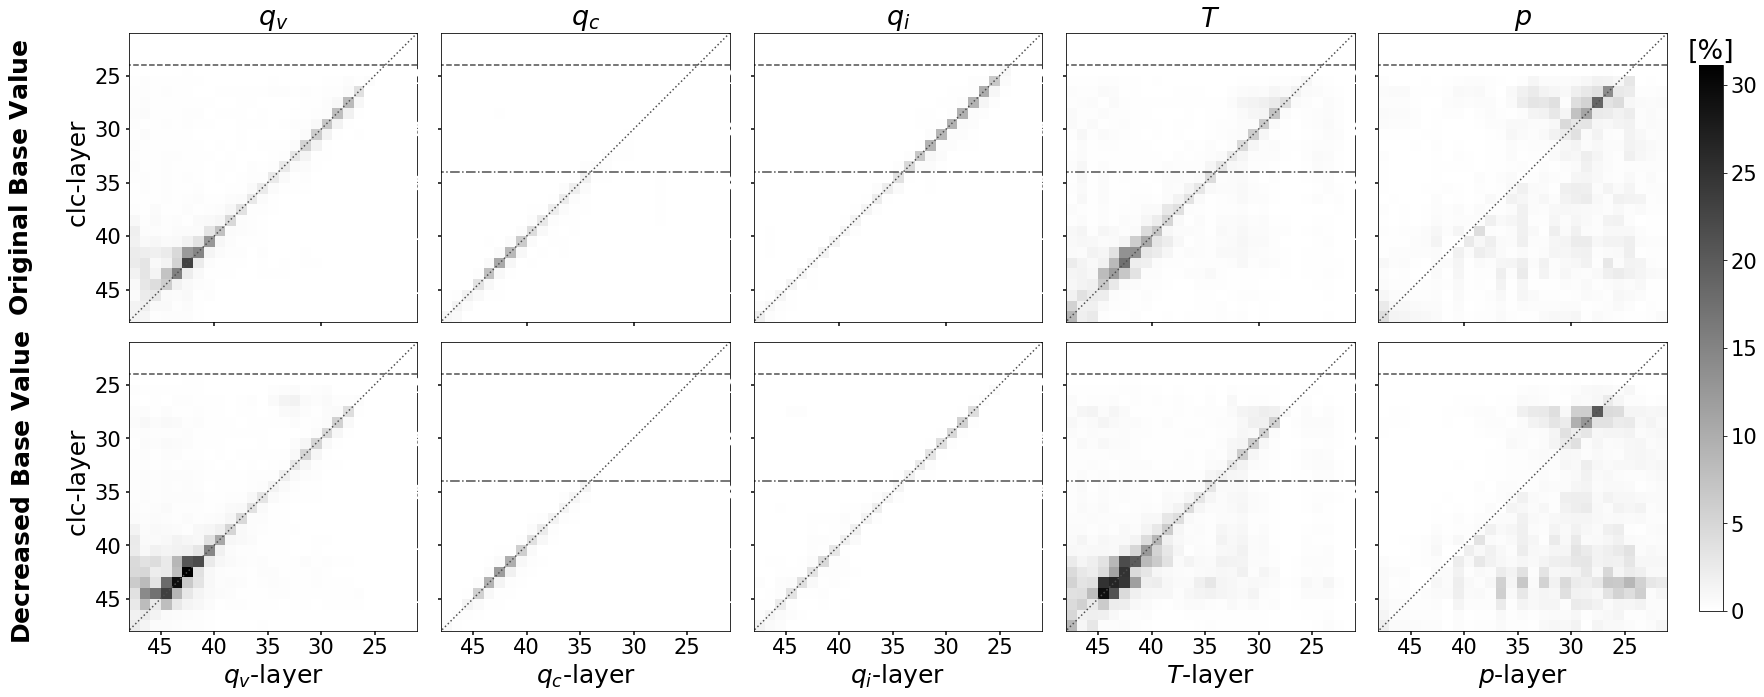

In [83]:
fig = plt.figure(figsize=(28,11))
# plt.subplots_adjust(bottom=0.1)

# label_size = 24 # x-labels, y-labels and titles
# tick_label_size = 15

## Constructed base ##

vmin = 0
vmax_r2b4 = np.max(mean_abs_constructed) 
vmax = vmax_r2b4

cmap_abs = LinearSegmentedColormap.from_list("", ["white","black"])

# First plot
ax = fig.add_subplot(251)
plt.title('$q_v$')
plt.ylabel(r"$\bf{Original\ Base\ Value}$" + '\n \n clc-layer')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
plt.xticks(color='w')
plt.tick_params(axis='both', width=1.5)
im_r2b5 = ax.imshow(np.flip(mean_abs_original[:, :27], axis=1), extent=(48,21,48,21), 
               vmin=0, vmax=vmax, cmap=cmap_abs)

# Second plot
ax = fig.add_subplot(252)
plt.title('$q_c$')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
ax.plot([21, 48], [34, 34], ls="-.", c=".3") # Freezing level
plt.xticks(color='w')
plt.yticks(color='w')
plt.tick_params(axis='both', width=1.5)
im_r2b5 = ax.imshow(np.flip(mean_abs_original[:, 27:54], axis=1), extent=(48,21,48,21), 
               vmin=0, vmax=vmax, cmap=cmap_abs)

# Third plot
ax = fig.add_subplot(253)
plt.title('$q_i$')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
ax.plot([21, 48], [34, 34], ls="-.", c=".3") # Freezing level
plt.xticks(color='w')
plt.yticks(color='w')
plt.tick_params(axis='both', width=1.5)
im_r2b5 = ax.imshow(np.flip(mean_abs_original[:, 54:81], axis=1), extent=(48,21,48,21), 
               vmin=0, vmax=vmax, cmap=cmap_abs)

# Forth plot
ax = fig.add_subplot(254)
plt.title('$T$')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
ax.plot([21, 48], [34, 34], ls="-.", c=".3") # Freezing level
plt.xticks(color='w')
plt.yticks(color='w')
plt.tick_params(axis='both', width=1.5)
im_r2b5 = ax.imshow(np.flip(mean_abs_original[:, 81:108], axis=1), extent=(48,21,48,21), 
                   vmin=0, vmax=vmax, cmap=cmap_abs)

# Fifth plot
ax = fig.add_subplot(255)
plt.xlabel('$p$-layer')
plt.title('$p$')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
# plt.xticks(color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.tick_params(axis='both', width=1.5)
im_r2b5 = ax.imshow(np.flip(mean_abs_original[:, 108:135], axis=1), extent=(48,21,48,21), 
               vmin=0, vmax=vmax, cmap=cmap_abs)

print('zg r2b5 has absolute SHAP values below %.3f'%np.max(mean_abs_original[:, 135:162]))

print('fr_land r2b5 has absolute SHAP values below %.3f\n'%np.max(mean_abs_original[:, 162]))

plt.subplots_adjust(wspace=0, hspace=0.2)

# # Colorbar axes
cbar_ax = fig.add_axes([0.91, 0.15, 0.012, 0.69])  # The dimensions [left, bottom, width, height] of the new axes. All
                                                 # quantities are in fractions of figure width and height.
cb_r2b5 = fig.colorbar(im_r2b5, cax=cbar_ax)
# cb_r2b5.ax.tick_params(labelsize=tick_label_size)
cb_r2b5.ax.set_title('[%]')

########################

## R2B4 ##

# First plot
ax = fig.add_subplot(256)
plt.xlabel('$q_v$-layer')
plt.ylabel(r"$\bf{Decreased\ Base\ Value}$" + '\n \n clc-layer')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
plt.tick_params(axis='both', width=1.5)
im_r2b4 = ax.imshow(np.flip(mean_abs_constructed[:, :27], axis=1), extent=(48,21,48,21), 
               vmin=vmin, vmax=vmax_r2b4, cmap=cmap_abs)
plt.xticks(ticks)

# Second plot
ax = fig.add_subplot(257)
plt.xlabel('$q_c$-layer')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
ax.plot([21, 48], [34, 34], ls="-.", c=".3") # Freezing level
plt.tick_params(axis='both', width=1.5)
plt.yticks(color='w')
im_r2b4 = ax.imshow(np.flip(mean_abs_constructed[:, 27:54], axis=1), extent=(48,21,48,21), 
               vmin=vmin, vmax=vmax_r2b4, cmap=cmap_abs)
plt.xticks(ticks)

# Third plot
ax = fig.add_subplot(258)
plt.xlabel('$q_i$-layer')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
ax.plot([21, 48], [34, 34], ls="-.", c=".3") # Freezing level
plt.tick_params(axis='both', width=1.5)
plt.yticks(color='w')
im_r2b4 = ax.imshow(np.flip(mean_abs_constructed[:, 54:81], axis=1), extent=(48,21,48,21), 
               vmin=vmin, vmax=vmax_r2b4, cmap=cmap_abs)
plt.xticks(ticks)

# Forth plot
ax = fig.add_subplot(259)
plt.xlabel('$T$-layer')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
ax.plot([21, 48], [34, 34], ls="-.", c=".3") # Freezing level
plt.tick_params(axis='both', width=1.5)
plt.yticks(color='w')
im_r2b4 = ax.imshow(np.flip(mean_abs_constructed[:, 81:108], axis=1), extent=(48,21,48,21), 
                   vmin=vmin, vmax=vmax_r2b4, cmap=cmap_abs)
plt.xticks(ticks)

# Fifth plot
ax = fig.add_subplot(2,5,10)
plt.xlabel('$p$-layer')
ax.plot([21, 48], [21, 48], ls=":", c=".3") # Diagonal
ax.plot([21, 48], [24, 24], ls="--", c=".3") # Tropopause
plt.tick_params(axis='both', width=1.5)
plt.yticks(color='w')
im_r2b4 = ax.imshow(np.flip(mean_abs_constructed[:, 108:135], axis=1), extent=(48,21,48,21), 
                   vmin=vmin, vmax=vmax_r2b4, cmap=cmap_abs)
plt.xticks(ticks)

print('zg r2b5 has absolute SHAP values below %.3f'%np.max(mean_abs_constructed[:, 135:162]))

print('fr_land r2b5 has absolute SHAP values below %.3f\n'%np.max(mean_abs_constructed[:, 162]))

plt.subplots_adjust(wspace=0, hspace=0.07)

# # # Colorbar axes
# cbar_ax = fig.add_axes([0.91, 0.13, 0.012, 0.35])  # The dimensions [left, bottom, width, height] of the new axes. All
#                                                 # quantities are in fractions of figure width and height.
# cb_r2b4 = fig.colorbar(im_r2b4, cax=cbar_ax)
# cb_r2b4.ax.tick_params(labelsize=tick_label_size)
# # cb.ax.set_title('[%]')

plt.savefig('figures/average_absolute_SHAP_values_base_value_comp.pdf')